In [2]:
import pandas as pd

df = pd.read_csv('./resources/weather.csv')

# filtering
# define cold days
coldDays = df['EST'][df['Temperature'] <= 25]
print(coldDays)


3      1/4/2016
4      1/5/2016
17    1/18/2016
18    1/19/2016
Name: EST, dtype: object


In [3]:
# find days with max temp
daysWithMaxHeat = df[df['Temperature'] == df['Temperature'].max()]
print(daysWithMaxHeat)


EST  Temperature  DewPoint  Humidity  Sea Level PressureIn  \
9  1/10/2016           50        46        71                 29.59   

   VisibilityMiles  WindSpeedMPH PrecipitationIn  CloudCover Events  \
9                4           NaN             1.8           7   Rain   

   WindDirDegrees  
9             109  


In [6]:
# max, mean, mon etc
meanTemp = df['Temperature'].mean() 
print(meanTemp)
print(df['Temperature'].describe())


34.67741935483871
count    31.000000
mean     34.677419
std       7.639315
min      20.000000
25%      29.000000
50%      35.000000
75%      39.500000
max      50.000000
Name: Temperature, dtype: float64


In [10]:
# general useful features
print(df.columns)
print(df.DewPoint.head())
print(df[['EST', 'Events']].head())


Index(['EST', 'Temperature', 'DewPoint', 'Humidity', 'Sea Level PressureIn',
       'VisibilityMiles', 'WindSpeedMPH', 'PrecipitationIn', 'CloudCover',
       'Events', 'WindDirDegrees'],
      dtype='object')
0    23
1    18
2    21
3     9
4    -3
Name: DewPoint, dtype: int64
        EST Events
0  1/1/2016    NaN
1  1/2/2016    NaN
2  1/3/2016    NaN
3  1/4/2016    NaN
4  1/5/2016    NaN


In [16]:
df = pd.read_csv('./resources/group.csv')

grouped_data = df.groupby('name')

for name, value in grouped_data:
    print(name, value)

print(grouped_data.max())
print(grouped_data.mean())


g1   name  value
0   g1      1
2   g1      3
3   g1      4
4   g1      5
g2   name  value
1   g2      2
5   g2      6
6   g2      7
      value
name       
g1        5
g2        7
      value
name       
g1     3.25
g2     5.00


In [21]:
# example for concat, mereg etc

sample_dataframe1 = pd.DataFrame({
    "group": ["g1", "g2", "g3"],
    "value": [1,2,3]
})

sample_dataframe2 = pd.DataFrame({
    "group": ["g4", "g5", "g6"],
    "value": [4,5,6]
})

joint_data = pd.concat([sample_dataframe1, sample_dataframe2],ignore_index=True)
sample_dataframe3 = pd.DataFrame({
    "group": ["g1", "g2", "g3", "g4", "g5", "g6"],
    "name": ["a1", "a2", "a3", "a4", "a5", "a6"]
})
joint_data = pd.merge(joint_data, sample_dataframe3)

print(joint_data)

group  value name
0    g1      1   a1
1    g2      2   a2
2    g3      3   a3
3    g4      4   a4
4    g5      5   a5
5    g6      6   a6


Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width',
       'Species'],
      dtype='object')
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


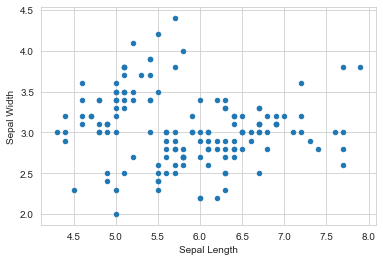

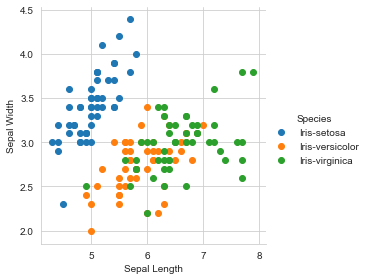

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

iris_df = pd.read_csv('./resources/iris.csv')

print(iris_df.columns)
print(iris_df["Species"].value_counts())
iris_df.plot(kind="scatter", x="Sepal Length",y="Sepal Width")

sns.set_style("whitegrid")
sns.FacetGrid(iris_df, hue="Species", height=4) \
    .map(plt.scatter, "Sepal Length", "Sepal Width") \
    .add_legend();
plt.show()